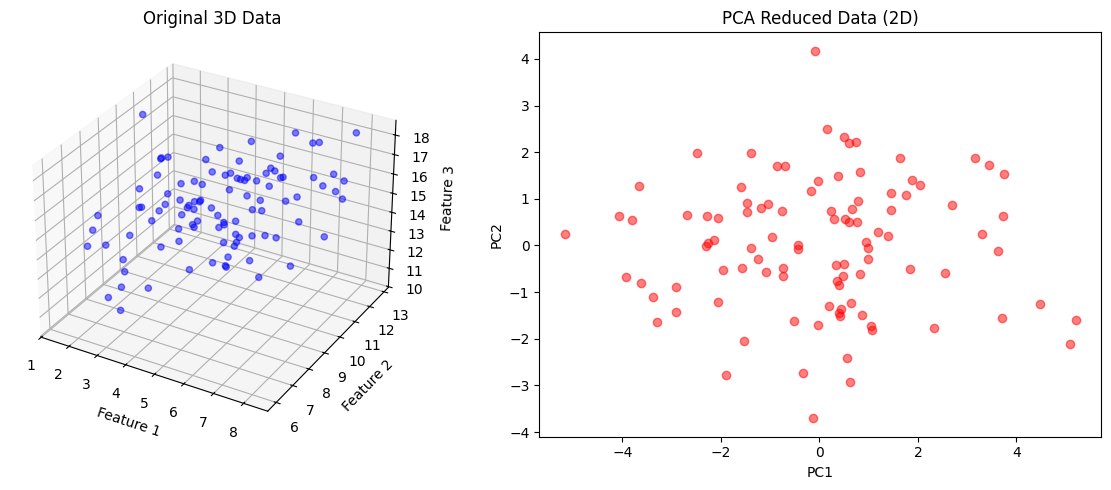

Explained Variance Ratios: [0.61962013 0.2748303  0.10554957]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate 3D dataset
np.random.seed(42)
X = np.random.multivariate_normal(
    mean=[5, 10, 15],
    cov=[[3, 2, 1], [2, 3, 2], [1, 2, 3]],
    size=100
)

# Standardize data (centering)
X_centered = X - np.mean(X, axis=0)

# Compute covariance matrix & eigen decomposition
cov_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by largest eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
top_2_eigenvectors = eigenvectors[:, sorted_indices[:2]]

# Transform data to 2D space
X_pca = X_centered @ top_2_eigenvectors

# Visualization
fig = plt.figure(figsize=(12, 5))

# 3D Scatter Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', alpha=0.5)
ax1.set_title("Original 3D Data")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")

# 2D PCA Scatter Plot
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c='red', alpha=0.5)
ax2.set_title("PCA Reduced Data (2D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

plt.tight_layout()
plt.show()

# Explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratios:", explained_variance)